# Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


# Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

# Business Risk:

- No or less demand and high supply
- High demand and no or less supply

# Requirement:

- Which variable are significant in predicting the demand for shared bikes
- How well those variabe describe the bike demands 

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the pandas and numpy libraries
import pandas as pd
import numpy as np

In [3]:
# Importing day.csv
day = pd.read_csv('day.csv')

In [4]:
# Looking at the first ten rows
day[day.holiday == 1].head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
16,17,17-01-2018,1,0,1,1,1,0,2,7.209153,8.83855,53.7500,12.999139,117,883,1000
51,52,21-02-2018,1,0,2,1,1,0,2,12.436653,14.20375,60.5000,20.625682,195,912,1107
104,105,15-04-2018,2,0,4,1,5,0,1,18.313347,22.09565,67.1250,15.167125,642,2484,3126
149,150,30-05-2018,2,0,5,1,1,0,1,30.066653,33.55460,68.5000,8.792075,1549,2549,4098
184,185,04-07-2018,3,0,7,1,1,0,2,29.793347,33.27085,63.7917,5.459106,3065,2978,6043
247,248,05-09-2018,3,0,9,1,1,0,2,27.606653,31.28230,79.0417,14.250632,1236,2115,3351
282,283,10-10-2018,4,0,10,1,1,0,1,23.404153,27.14625,73.3750,2.834381,1514,3603,5117
314,315,11-11-2018,4,0,11,1,5,0,1,13.290847,15.34085,44.6250,21.083225,440,2928,3368
327,328,24-11-2018,4,0,11,1,4,0,1,15.306653,18.62355,54.9167,11.209368,560,935,1495
359,360,26-12-2018,1,0,12,1,1,0,1,13.191299,15.77675,50.6957,16.044155,430,887,1317


In [5]:
#Lets look at the total number of rows and columns
day.shape

(730, 16)

In [6]:
#Lets look if the dataset has any null values
#Also lets have a look at the data type of the columns
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### We can see that that their are no null values present in the dataset

In [7]:
# Lets get some more information about the dataset using describe() methods
#We can see the count, mean, standard deviation, min, max and different quantile of the int and float columns
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Instant Column represents record index and hence not useful in predition of the target variable "cnt"

In [8]:
day.instant.unique().size

730

In [9]:
#lets drop the instant column
day.drop('instant',axis=1,inplace=True)

#### As per data dictionary and the below results casual and registered column together form the target variable "cnt"

#### This data is not present at the time of prediction for future data

In [10]:
(day.casual+day.registered == day.cnt).value_counts()

True    730
dtype: int64

In [11]:
#lets drop the 
day.drop(["casual","registered"],axis=1,inplace=True)

#### We can see the month and year already represented in other column. Lets retain only date from the column

In [12]:
day['dteday'] = day.dteday.apply(lambda x : int(x[0:2]))

# Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [13]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
#lets get the continuous variables from the list
for col in day.columns:
    if day[col].nunique() > 12 and (day[col].dtype == np.int64 or day[col].dtype == np.float64):
        print('"',col,'"',end=",",sep="")
        #print("Name :",col,"- >", df[col].nunique(),"- >", df[col].dtype)

"dteday","temp","atemp","hum","windspeed","cnt",

In [15]:
#lets get the categorical variables from the list
for col in day.columns:
    if day[col].nunique() <= 12 :
        print('"',col,'"',end=",",sep="")
        #print("Name :",col,"- >", df[col].nunique())

"season","yr","mnth","holiday","weekday","workingday","weathersit",

In [16]:
#lets get the ones missied out in both
for col in day.columns:
    if day[col].nunique() > 12 and day[col].nunique()!=day.shape[0] and (day[col].dtype == object):
        print('"',col,'"',end=",",sep="")
        #print("Name :",col,"- >", df[col].nunique(),"- >", df[col].dtype)

In [17]:
cont_col = ["dteday","temp","atemp","hum","windspeed","cnt"]
cat_col = ["season","yr","mnth","holiday","weekday","workingday","weathersit"]

# Univatiant Analysis

In [18]:
def plot_box_and_dist(col):
    sns.boxplot(day[col])
    plt.title("Boxplot for "+col)
    plt.show()
    sns.distplot(day[col])#distribution plot
    plt.title("Density Histogram for "+col)
    plt.show()
    print(day[col].describe())#Data metrics for the column selected
    print()
    print("*************************************************************************")

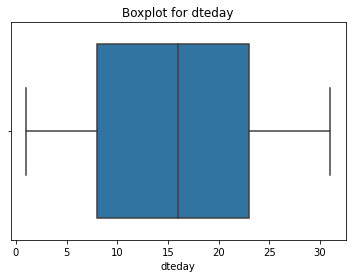

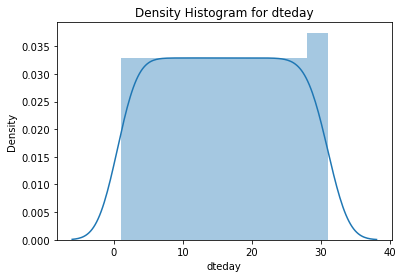

count    730.000000
mean      15.720548
std        8.802278
min        1.000000
25%        8.000000
50%       16.000000
75%       23.000000
max       31.000000
Name: dteday, dtype: float64

*************************************************************************


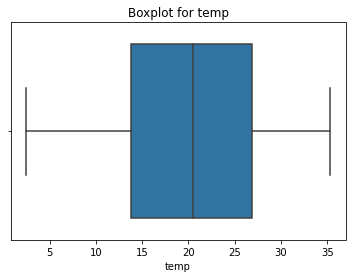

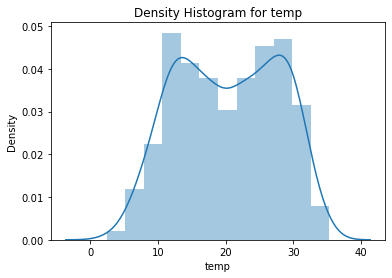

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64

*************************************************************************


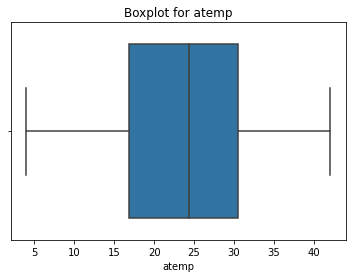

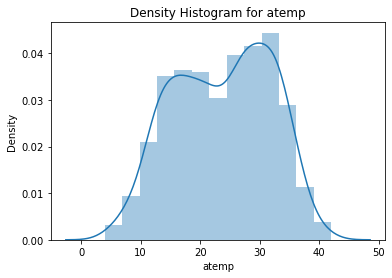

count    730.000000
mean      23.726322
std        8.150308
min        3.953480
25%       16.889713
50%       24.368225
75%       30.445775
max       42.044800
Name: atemp, dtype: float64

*************************************************************************


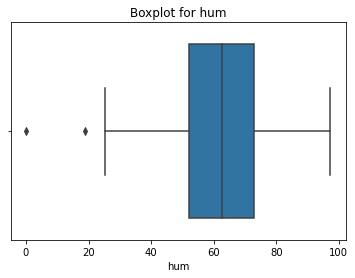

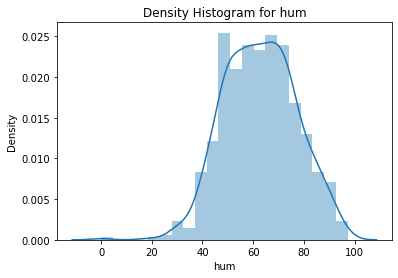

count    730.000000
mean      62.765175
std       14.237589
min        0.000000
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: hum, dtype: float64

*************************************************************************


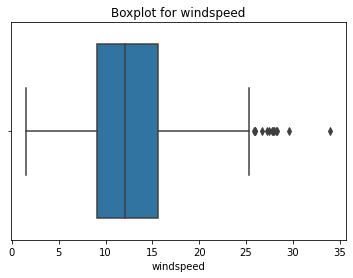

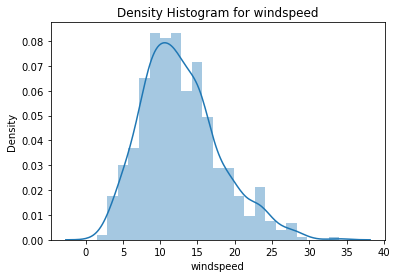

count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       34.000021
Name: windspeed, dtype: float64

*************************************************************************


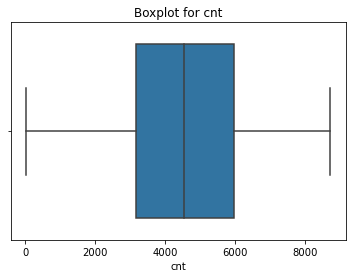

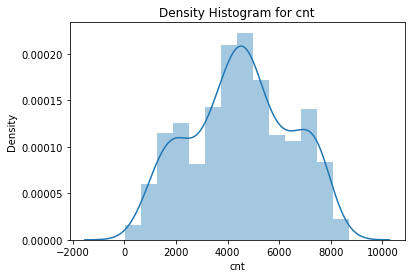

count     730.000000
mean     4508.006849
std      1936.011647
min        22.000000
25%      3169.750000
50%      4548.500000
75%      5966.000000
max      8714.000000
Name: cnt, dtype: float64

*************************************************************************


In [19]:
for col in cont_col:
    plot_box_and_dist(col)

### Findings
* The quartiles for atemp are on the higher side when compared to temp
* Mean of temp is 20.3 and atemp is 23.7
* The 25% and 75% for hum is 52 and 72.
* The 25% and 75% for windspeed is 9 and 15.

In [20]:
def plot_count(col):
    plt.figure(figsize=(10,5))
    sns.countplot(day[col],order=sorted(day[col].unique()))
    plt.title("Countplot for "+col)
    plt.xticks(rotation=90)
    plt.show()
    print("*****************************************************************************************")

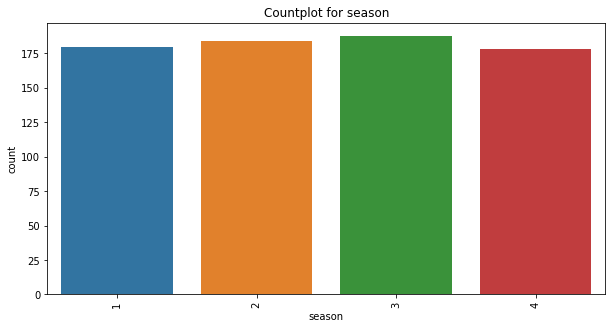

*****************************************************************************************


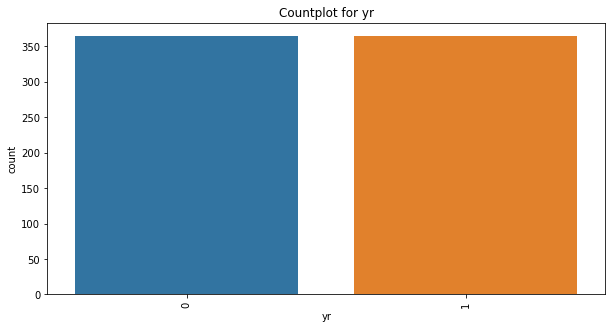

*****************************************************************************************


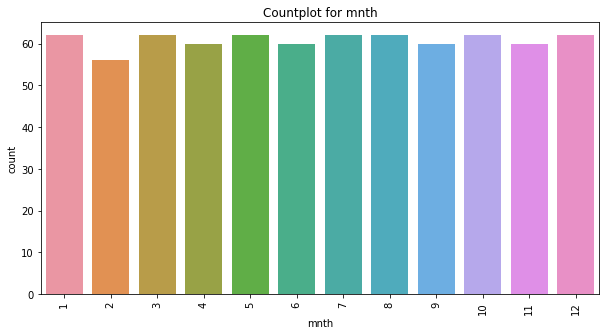

*****************************************************************************************


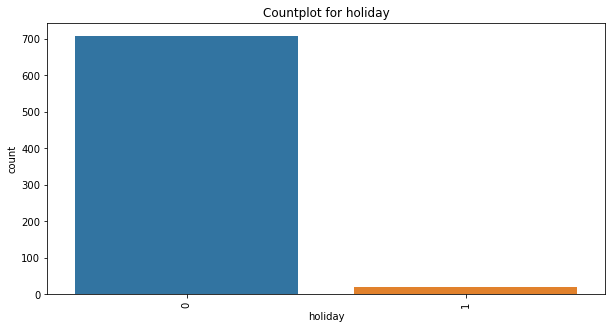

*****************************************************************************************


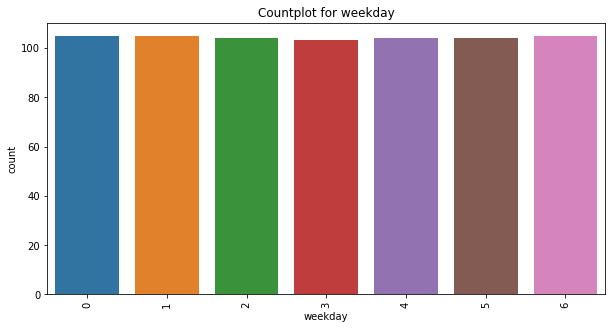

*****************************************************************************************


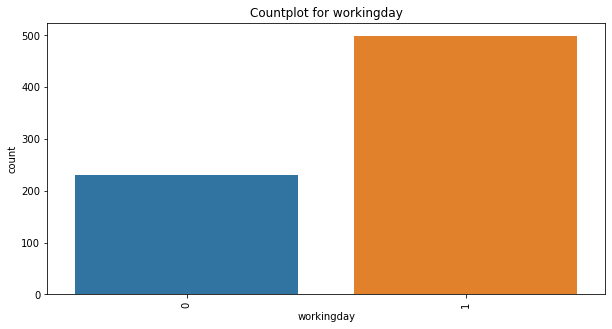

*****************************************************************************************


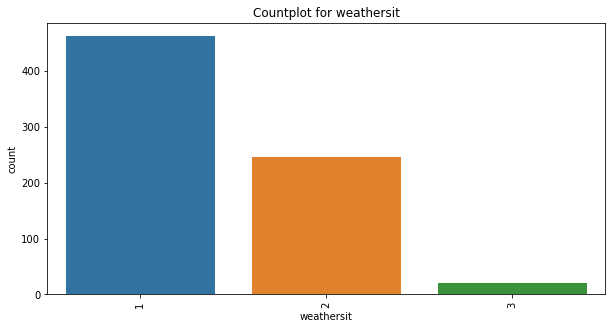

*****************************************************************************************


In [21]:
for col in cat_col:
    plot_count(col)

### Findings
* Season, yr, mnth, weeekday have equal count plot among them self 
* holiday, workingday and weahtersit hve unequal count plot among them self 

# Bivariate Analysis

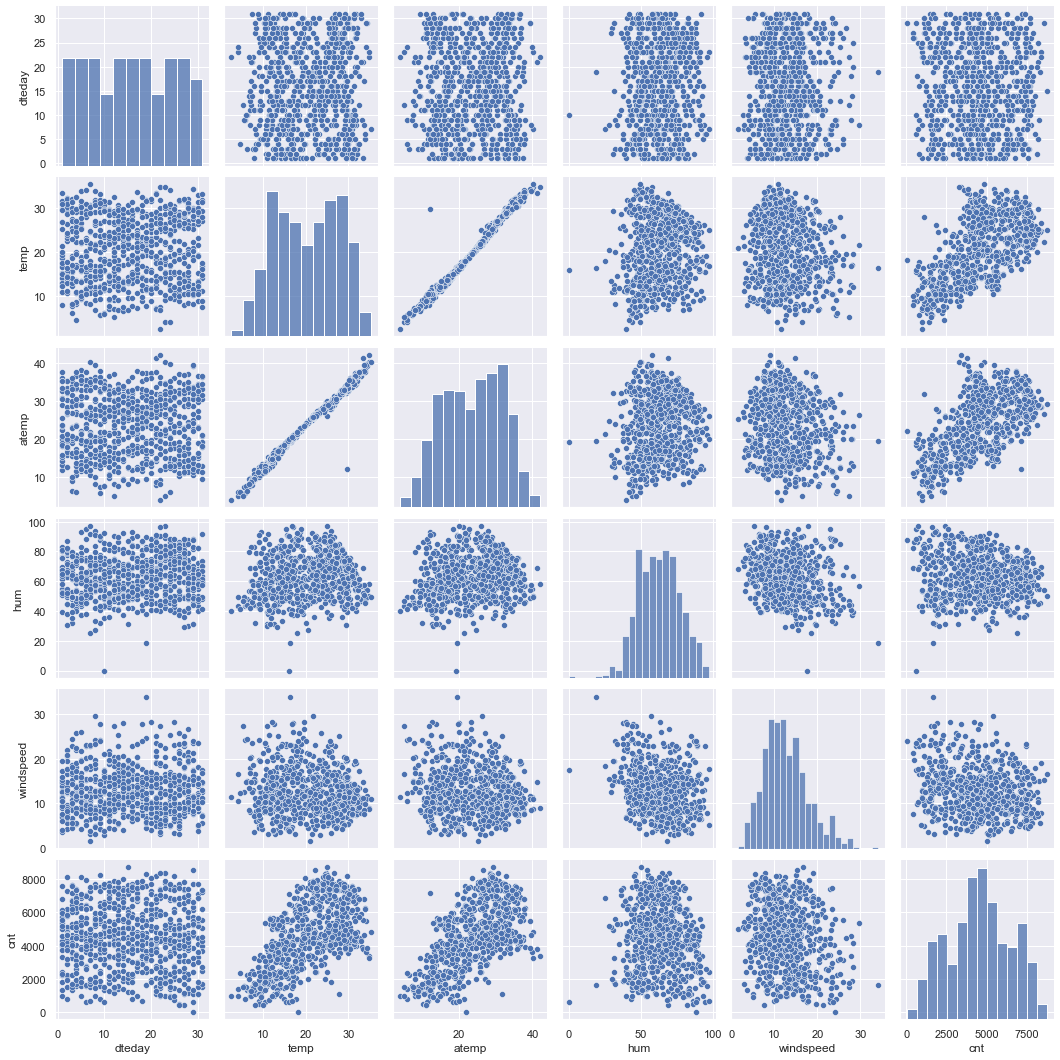

In [22]:
#Lets draw a pair plot for all the continuos columns
sns.set_theme(color_codes=True)
sns.pairplot(day[cont_col])
plt.show()

#### lets create bins for the continuous column so that we can convert them into categorical columns for the analysis

In [23]:
dteday_bins = [0,5,10,15,20,25,30,35,40,45]
temp_bins = [0,5,10,15,20,25,30,35,40,45]
atemp_bins = [0,5,10,15,20,25,30,35,40,45]
hum_bins = [0,10,20,30,40,50,60,70,80,90,100]
windspeed_bins = [0,5,10,15,20,25,30,35,40,45]

In [24]:
pd.cut(day.temp, temp_bins)#lets use the cut method the assign the bin to each value of the column

0      (10, 15]
1      (10, 15]
2       (5, 10]
3       (5, 10]
4       (5, 10]
         ...   
725    (10, 15]
726    (10, 15]
727    (10, 15]
728    (10, 15]
729     (5, 10]
Name: temp, Length: 730, dtype: category
Categories (9, interval[int64, right]): [(0, 5] < (5, 10] < (10, 15] < (15, 20] ... (25, 30] < (30, 35] < (35, 40] < (40, 45]]

In [25]:
def plot_bar(col1,col2,bins):
    newdf = pd.DataFrame(day.cnt)
    newdf[col1] = day[col1]
    newdf[col2] = pd.cut(day[col2], bins)
    plt.figure(figsize=(10,4))
    graph = sns.barplot(y=day.cnt,x=newdf[col2],orient="v")#Bar Plot
    graph.axhline(day.cnt.mean())
    plt.title("Barplot for cnt for "+col2)
    plt.ylabel("cnt")
    plt.xlabel(col2)
    plt.xticks(rotation=90)
    plt.show()
    print("*****************************************************************************************")

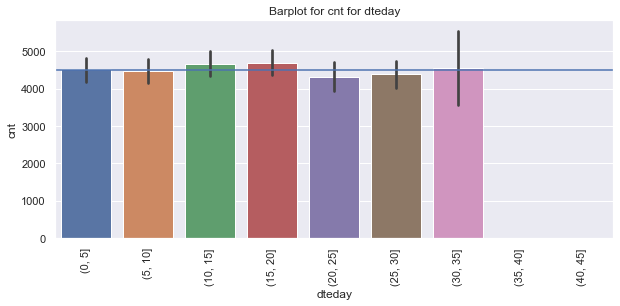

*****************************************************************************************


In [26]:
col1='cnt'
col2='dteday'
bins = dteday_bins
plot_bar(col1,col2,bins)

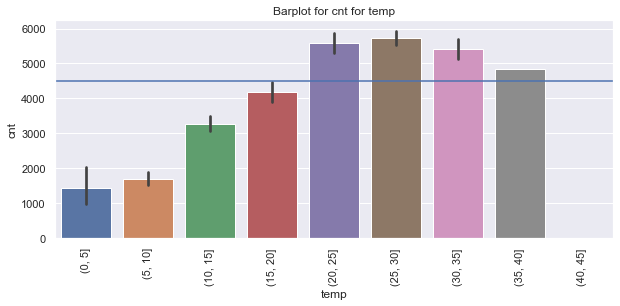

*****************************************************************************************


In [27]:
col1='cnt'
col2='temp'
bins = temp_bins
plot_bar(col1,col2,bins)

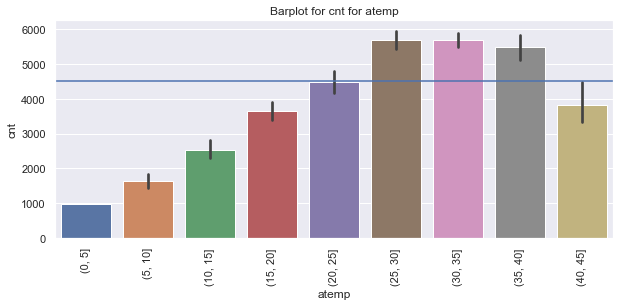

*****************************************************************************************


In [28]:
col1='cnt'
col2='atemp'
bins = atemp_bins
plot_bar(col1,col2,bins)

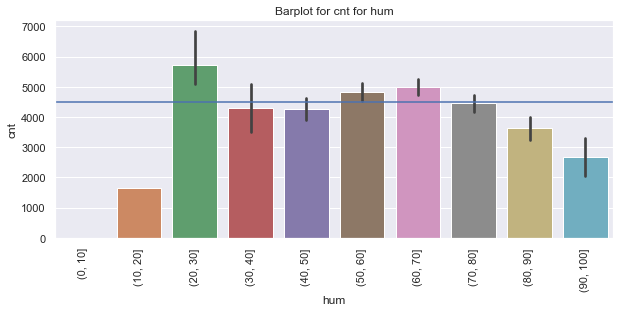

*****************************************************************************************


In [29]:
col1='cnt'
col2='hum'
bins = hum_bins
plot_bar(col1,col2,bins)

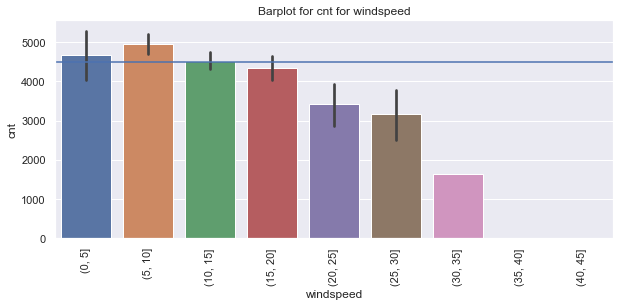

*****************************************************************************************


In [30]:
col1='cnt'
col2='windspeed'
bins = windspeed_bins
plot_bar(col1,col2,bins)

### Analysis

<ol>
    <li>CNT : Average demand for the bike is <b>~4508 per day</b></li>
    <li>DTEDAY : Does not have much affect on the demand</li>
    <li>TEMP : <b>20-40</b>degress temperature have a higher average rental bike per day than overall average rental<br>
    20-40 have a higher average rental bike per day than 0-20</li>
    <li>ATEMP : <b>25-40</b>degress temperature have a higher average rental bike per day than overall average rental<br>
    25-40 degress temperature have a higher average rental bike per day than 0-25</li>
    <li>HUM : <b>20-30</b> humidity levels have a higher average rental bike per day than overall average rental<br>
    20-30 humidity levels have a higher average rental bike per day than other levels</li>
    <li>WINDSPEED : <b>0-10</b> windspeed levels have a higher average rental bike per day than overall average rental<br>
    0-10 windspeed levels have a higher average rental bike per day than other levels</li>
</ol>

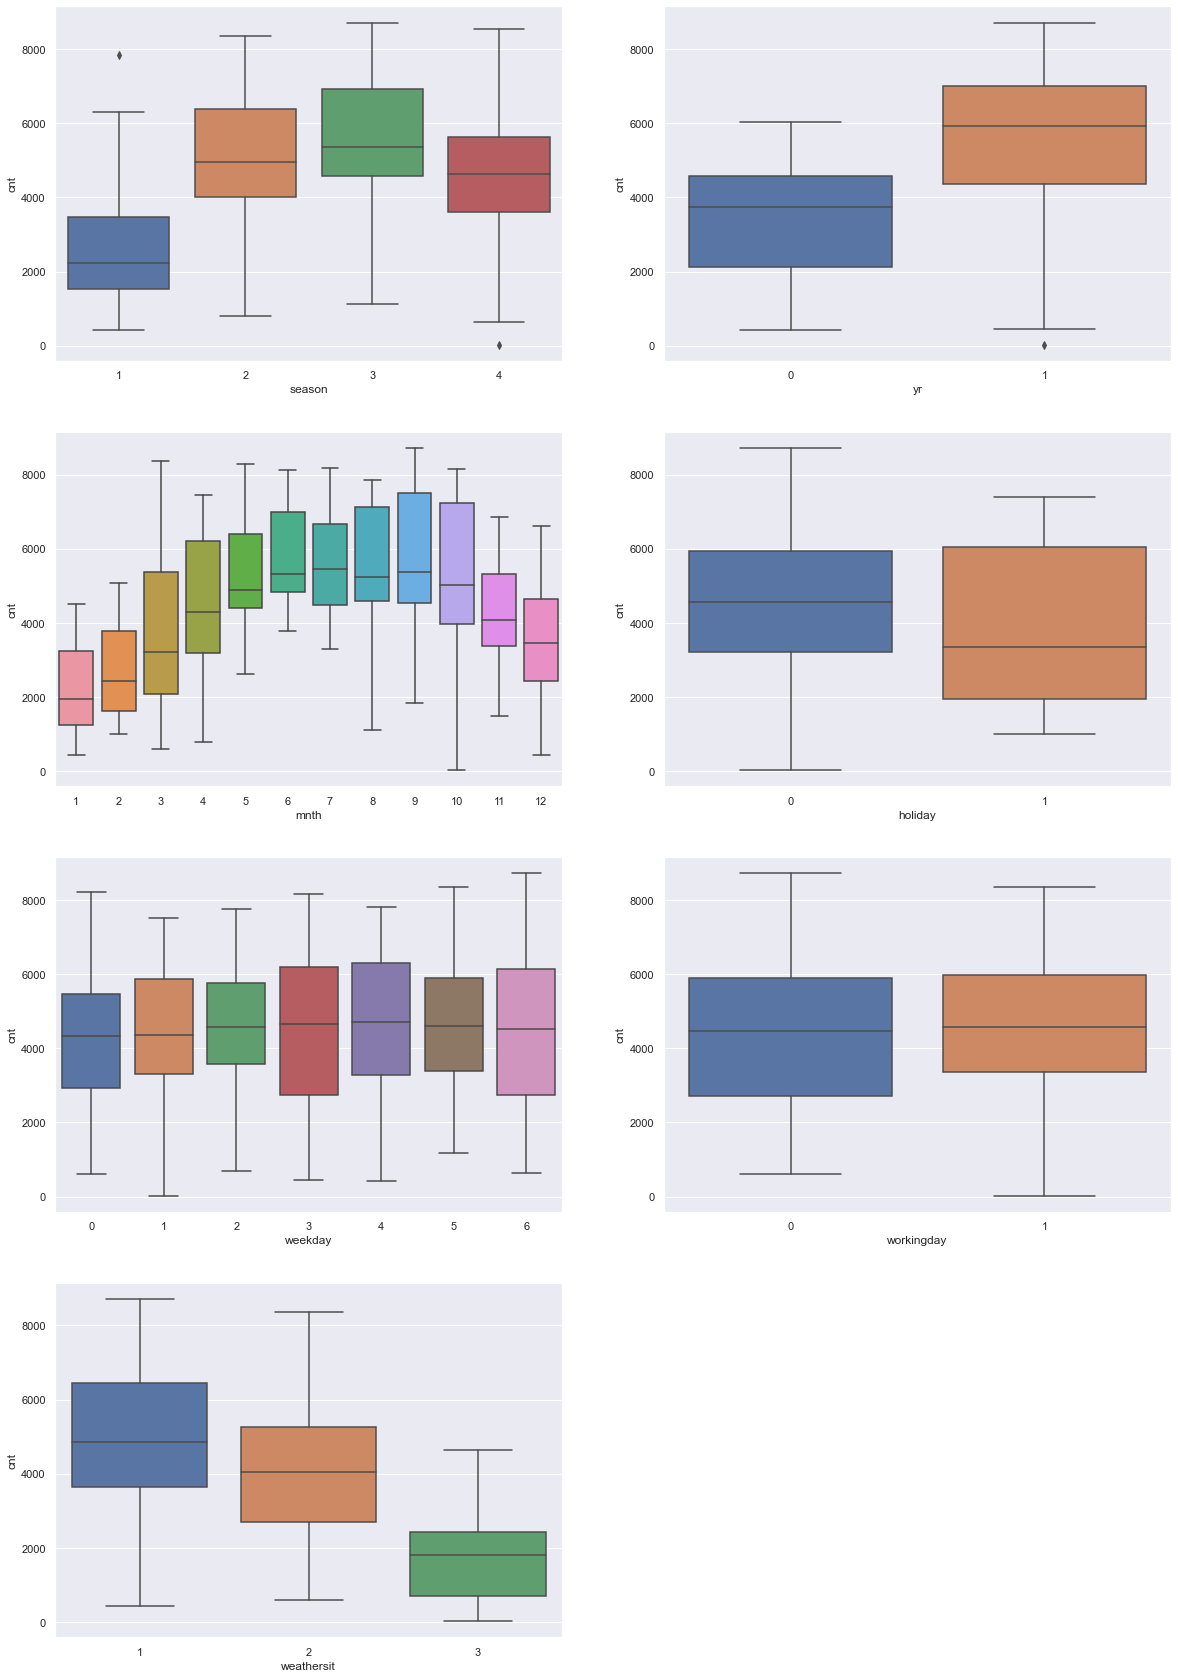

In [31]:
sns.set_theme(color_codes=True)
plt.figure(figsize=(20,30))
for i in range(len(cat_col)):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = cat_col[i], y = 'cnt', data = day)
plt.show()

In [32]:
#Average rental bike per day
day.cnt.mean()

4508.006849315068

In [33]:
for col in cat_col:
    print(pd.concat([(day.groupby(col).cnt.mean()).rename("Cnt Average"), (day.groupby(col).cnt.mean()>day.cnt.mean()).rename("Avg > Overall Avg")], axis=1).sort_values("Cnt Average"))
    #print(day.groupby(col).cnt.mean())
    #print(day.groupby(col).cnt.mean()>day.cnt.mean())
    print("***************************************************************")

        Cnt Average  Avg > Overall Avg
season                                
1       2608.411111              False
4       4728.162921               True
2       4992.331522               True
3       5644.303191               True
***************************************************************
    Cnt Average  Avg > Overall Avg
yr                                
0   3405.761644              False
1   5610.252055               True
***************************************************************
      Cnt Average  Avg > Overall Avg
mnth                                
1     2176.338710              False
2     2669.964286              False
12    3403.806452              False
3     3692.258065              False
11    4247.183333              False
4     4484.900000              False
10    5199.225806               True
5     5349.774194               True
7     5563.677419               True
8     5664.419355               True
9     5766.516667               True
6     5772.366667

### Analysis

<ol>
    <li>SEASON : <b>Fall, Summer and Winter</b> have a higher average rental bike per day than overall average rental<br>
    Fall and Summer have a higher average rental bike per day than Winter and Spring</li>
    <li>YR : <b>2019 year</b> have a higher average rental bike per day than overall average rental<br>
    2019 year have a higher average rental bike per day than 2018 year</li>
    <li>MNTH : <b>6,9,8,7,5 and 10 months</b> have a higher average rental bike per day than overall average rental<br>
    6,9,8,7,5 and 10 have a higher average rental bike per day than 4,11,3,12,2,1</li>
    <li>HOLIDAY : <b>Non Holidays</b> have a higher average rental bike per day than overall average rental<br>
    Non Holidays have a higher average rental bike per day than Holidays</li>
    <li>WEEKDAY : <b>Weekday 2,3,4,5,6</b> have a higher average rental bike per day than overall average rental<br>
    Weekday 2,3,4,5,6 have a higher average rental bike per day than Weekday 1,2</li>
    <li>WORKINGDAY : <b>Working day</b> have a higher average rental bike per day than overall average rental<br>
    Working day have a higher average rental bike per day than Non Working Day</li>
    <li>WEATHERSIT : <b>Clear, Few clouds, Partly cloudy, Partly cloudy Weather</b> have a higher average rental bike per day than overall average rental<br>
    Clear, Few clouds, Partly cloudy, Partly cloudy Weather have a higher average rental bike per day than Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist, Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds</li>
</ol>

# Correlation Matrix

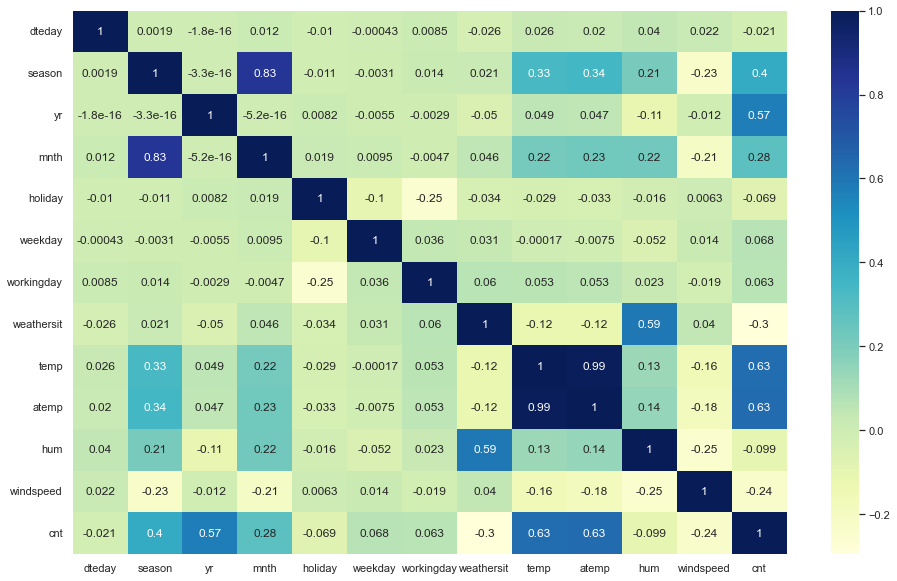

In [34]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(day.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Analysis

* temp, atemp, yr, season and mnth have high correlation with target variable count.
* temp and ateam have a perfect correlation with each other
* hum and weathersit have high correlation with each other
* season with temp, atemp, hum have high correlation with each other

# Data Preparation

- You can see that your dataset has many columns with values as 'Yes' or 'No'.

- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

In [35]:
for col in ['season','mnth','weekday','weathersit']:
    print("Column Name :",col)
    print(day[col].value_counts())
    print("********************************************************************")

Column Name : season
3    188
2    184
1    180
4    178
Name: season, dtype: int64
********************************************************************
Column Name : mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64
********************************************************************
Column Name : weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64
********************************************************************
Column Name : weathersit
1    463
2    246
3     21
Name: weathersit, dtype: int64
********************************************************************


In [36]:
day.season = day.season.replace([1,2,3,4],['spring', 'summer', 'fall', 'winter'])
day.weathersit = day.weathersit.replace([1,2,3],['clear', 'mist', 'light_snow'])

In [37]:
day = pd.get_dummies(day, columns = ['season','mnth','weekday','weathersit'],drop_first = True)
print(day.columns)

Index(['dteday', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'season_spring', 'season_summer', 'season_winter',
       'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'weathersit_light_snow', 'weathersit_mist'],
      dtype='object')


# Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [38]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(day, train_size = 0.7, test_size = 0.3, random_state = 100)

# Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for `area`, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler()

In [41]:
df_train.describe()

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_light_snow,weathersit_mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,15.613725,0.507843,0.025490,0.676471,20.102429,23.493909,63.112926,12.831318,4486.382353,0.243137,...,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.029412,0.343137
std,8.899450,0.500429,0.157763,0.468282,7.431169,8.090038,14.156632,5.291832,1952.158739,0.429398,...,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.169124,0.475223
min,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,22.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,0.000000,0.000000,0.000000,13.606865,16.603063,52.270825,9.041918,3120.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16.000000,1.000000,0.000000,1.000000,20.209597,24.020400,63.437500,12.083182,4530.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,23.000000,1.000000,0.000000,1.000000,26.615847,30.177700,73.250025,15.750879,5973.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,31.000000,1.000000,1.000000,1.000000,35.328347,42.044800,97.041700,34.000021,8714.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
for col in df_train.columns:
    if df_train[col].max() > 1 or df_train[col].min() <0:
        print(col,"----",df_train[col].min())
        print(col,"----",df_train[col].max())

dteday ---- 1
dteday ---- 31
temp ---- 2.4243464
temp ---- 35.328347
atemp ---- 3.95348
atemp ---- 42.0448
hum ---- 0.0
hum ---- 97.0417
windspeed ---- 2.8343814
windspeed ---- 34.000021
cnt ---- 22
cnt ---- 8714


In [43]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['dteday','temp','atemp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [44]:
df_train.describe()

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_light_snow,weathersit_mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.487124,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,...,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.029412,0.343137
std,0.296648,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,...,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.233333,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.733333,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
for col in df_train.columns:
    if df_train[col].max() > 1 or df_train[col].min() <0:
        print(col,"----",df_train[col].min())
        print(col,"----",df_train[col].max())

cnt ---- 0.0
cnt ---- 1.0000000000000002


#### Dividing into X and Y sets for the model building

In [46]:
y_train = df_train.pop('cnt')
X_train = df_train

# Building our model using RFE

In [47]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [48]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 1)# running RFE
rfe = rfe.fit(X_train, y_train)

In [49]:
#lets sort based on the rank
l1 = list(zip(X_train.columns,rfe.support_,rfe.ranking_))
sorted(l1,key=lambda x : x[2])

[('temp', True, 1),
 ('hum', False, 2),
 ('windspeed', False, 3),
 ('yr', False, 4),
 ('weathersit_light_snow', False, 5),
 ('season_spring', False, 6),
 ('holiday', False, 7),
 ('mnth_9', False, 8),
 ('season_winter', False, 9),
 ('weathersit_mist', False, 10),
 ('mnth_5', False, 11),
 ('mnth_3', False, 12),
 ('mnth_4', False, 13),
 ('mnth_6', False, 14),
 ('mnth_8', False, 15),
 ('mnth_10', False, 16),
 ('weekday_6', False, 17),
 ('workingday', False, 18),
 ('season_summer', False, 19),
 ('atemp', False, 20),
 ('mnth_2', False, 21),
 ('mnth_7', False, 22),
 ('mnth_11', False, 23),
 ('mnth_12', False, 24),
 ('weekday_1', False, 25),
 ('weekday_2', False, 26),
 ('weekday_5', False, 27),
 ('dteday', False, 28),
 ('weekday_3', False, 29),
 ('weekday_4', False, 30)]

In [50]:
#lets select the Top 18 columns based on the RFE rank
colT18 = X_train.columns[rfe.ranking_<=18]
colT18

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_3', 'mnth_4', 'mnth_5',
       'mnth_6', 'mnth_8', 'mnth_9', 'mnth_10', 'weekday_6',
       'weathersit_light_snow', 'weathersit_mist'],
      dtype='object')

In [51]:
#lets create a custom method to create a linear regresion model which prints the statistics and the VIF values and returns the model
def linearRegression(X_train,y_train):
    # Adding a constant variable 
    X_train_rfe = sm.add_constant(X_train)

    #Running the linear model
    lm = sm.OLS(y_train,X_train_rfe).fit()

    #Let's see the summary of our linear model
    print(lm.summary())
    
    print("*********************************************************\n")
    
    # Calculate the VIFs for the new model
    vif = pd.DataFrame()
    X = X_train_rfe.drop("const",axis=1)
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
    return X_train_rfe,lm

In [52]:
#Lets create the first model with all columns
_ = linearRegression(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     96.33
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          8.09e-180
Time:                        17:36:01   Log-Likelihood:                 528.08
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     480   BIC:                            -869.1
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.22

In [53]:
#lets create a model with the top 18 columns selected by RFE
_ = linearRegression(X_train[colT18],y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     155.8
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          1.05e-189
Time:                        17:36:01   Log-Likelihood:                 524.02
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     491   BIC:                            -929.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

We can see that 
- hum, temp and workingday have VIF value greater than 5
- holiday  has p value greater than 0.05

**lets drop holiday as it high p value**

In [54]:
X_train_minusholiday = X_train[colT18].drop(['holiday'], axis=1)
_ = linearRegression(X_train_minusholiday,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.1
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          3.91e-190
Time:                        17:36:01   Log-Likelihood:                 522.37
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     492   BIC:                            -932.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

We can see that 
- hum, temp and workingday have VIF value greater than 5

**lets drop hum as it high VIF value**

In [55]:
X_train_minushum = X_train_minusholiday.drop(['hum'], axis=1)
_ = linearRegression(X_train_minushum,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     168.2
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          7.37e-188
Time:                        17:36:01   Log-Likelihood:                 514.22
No. Observations:                 510   AIC:                            -994.4
Df Residuals:                     493   BIC:                            -922.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.16

We can see that 
- temp have VIF value greater than 5

**lets drop temp as it higher p value and high VIF**

In [56]:
X_train_minustemp = X_train_minushum.drop(['temp'], axis=1)
_ = linearRegression(X_train_minustemp,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     127.5
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          6.65e-159
Time:                        17:36:01   Log-Likelihood:                 442.28
No. Observations:                 510   AIC:                            -852.6
Df Residuals:                     494   BIC:                            -784.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.45

We can see significant drop in the the r2 and adj r2 for the model

**Hence the column temp cannot be dropped from the table**

# Final Model

In [57]:
X_train_minushum = X_train_minusholiday.drop(['hum'], axis=1)
X_train_rfe,lm = linearRegression(X_train_minushum,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     168.2
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          7.37e-188
Time:                        17:36:01   Log-Likelihood:                 514.22
No. Observations:                 510   AIC:                            -994.4
Df Residuals:                     493   BIC:                            -922.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.16

In [58]:
#lets have look at the coefficents of the model for different features
lm.params.sort_values()

weathersit_light_snow   -0.296761
windspeed               -0.154429
weathersit_mist         -0.083826
season_spring           -0.075924
mnth_10                  0.049952
mnth_8                   0.051156
workingday               0.053324
mnth_3                   0.062035
mnth_6                   0.063313
weekday_6                0.065144
mnth_4                   0.070493
season_winter            0.083347
mnth_5                   0.088043
mnth_9                   0.112402
const                    0.169345
yr                       0.235197
temp                     0.412069
dtype: float64

#### wethersit_light_snow, windspeed, weathersit_mist, season_spring have indirect dependency with the target variable "cnt"

#### mnth_10, mnth_8 , workingday, mnth_3, mnth_6, weekday_6, mnth_4, season_winter, mnth_5, mnth_9, yr, temp have direct dependency with the target variable "cnt"

In [59]:
#lets create a equation for the model
print("cnt = ",end='')
for index in lm.params.index:
    print(index,"*",round(lm.params[index],3),end=' + ')
print(0)

cnt = const * 0.169 + yr * 0.235 + workingday * 0.053 + temp * 0.412 + windspeed * -0.154 + season_spring * -0.076 + season_winter * 0.083 + mnth_3 * 0.062 + mnth_4 * 0.07 + mnth_5 * 0.088 + mnth_6 * 0.063 + mnth_8 * 0.051 + mnth_9 * 0.112 + mnth_10 * 0.05 + weekday_6 * 0.065 + weathersit_light_snow * -0.297 + weathersit_mist * -0.084 + 0


In [60]:
#lets sort the coefficents of the model
abs(lm.params).sort_values()

mnth_10                  0.049952
mnth_8                   0.051156
workingday               0.053324
mnth_3                   0.062035
mnth_6                   0.063313
weekday_6                0.065144
mnth_4                   0.070493
season_spring            0.075924
season_winter            0.083347
weathersit_mist          0.083826
mnth_5                   0.088043
mnth_9                   0.112402
windspeed                0.154429
const                    0.169345
yr                       0.235197
weathersit_light_snow    0.296761
temp                     0.412069
dtype: float64

# Prediction for Training Data

In [61]:
y_train_cnt = lm.predict(X_train_rfe)

# Proof for Linear Regrssion Assumptions

## Assumption of Normally Distributed Error Terms

Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

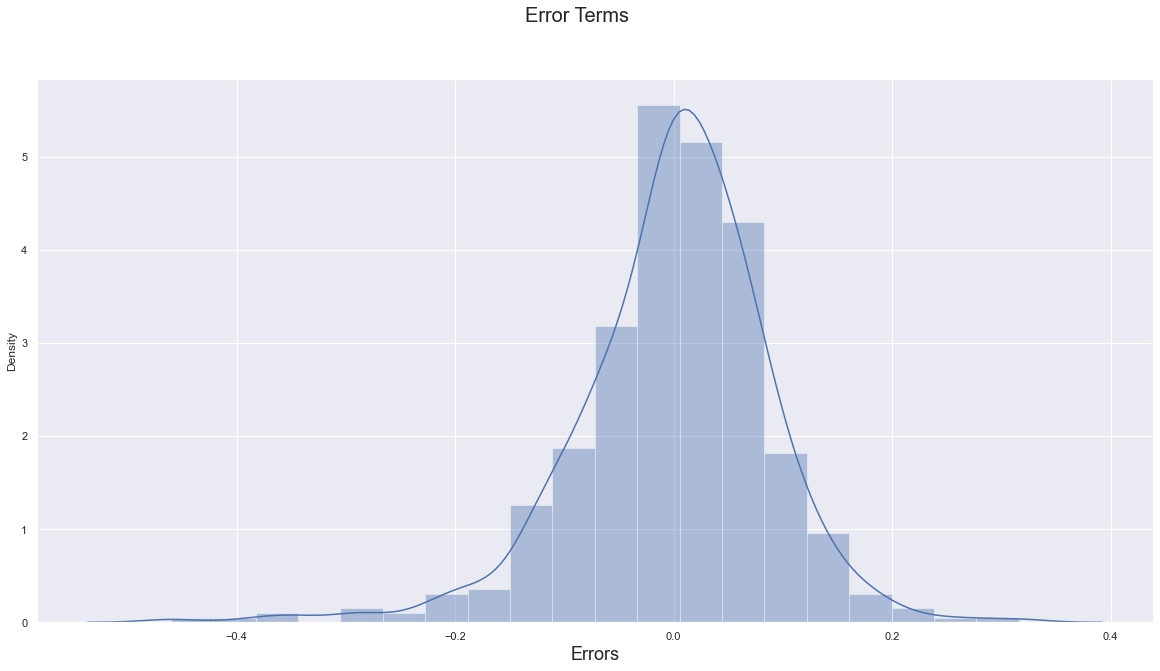

In [62]:
# Plot the histogram of the error terms
sns.set_theme(color_codes=True)
plt.figure(figsize=(20,10))
sns.distplot((y_train - y_train_cnt), bins = 20)
plt.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  
plt.show()# X-label

## Assumption of Error Terms Being Independent

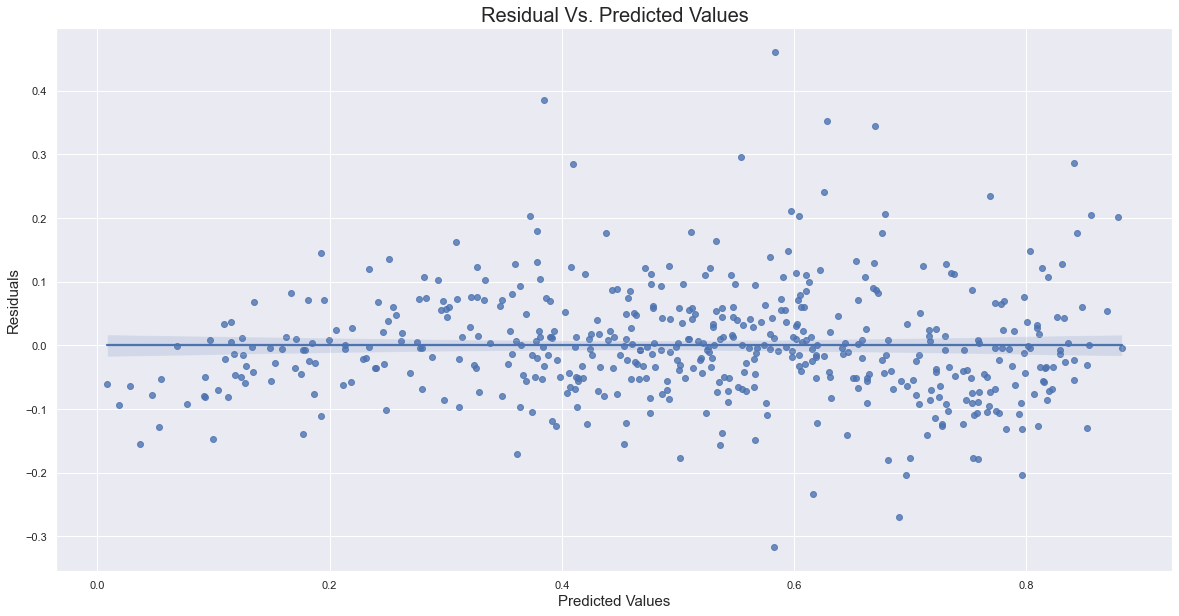

In [63]:
sns.set_theme(color_codes=True)
plt.figure(figsize=(20,10))
sns.regplot(x=y_train_cnt, y=y_train_cnt - y_train)
plt.title('Residual Vs. Predicted Values', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

# Homoscedasticity

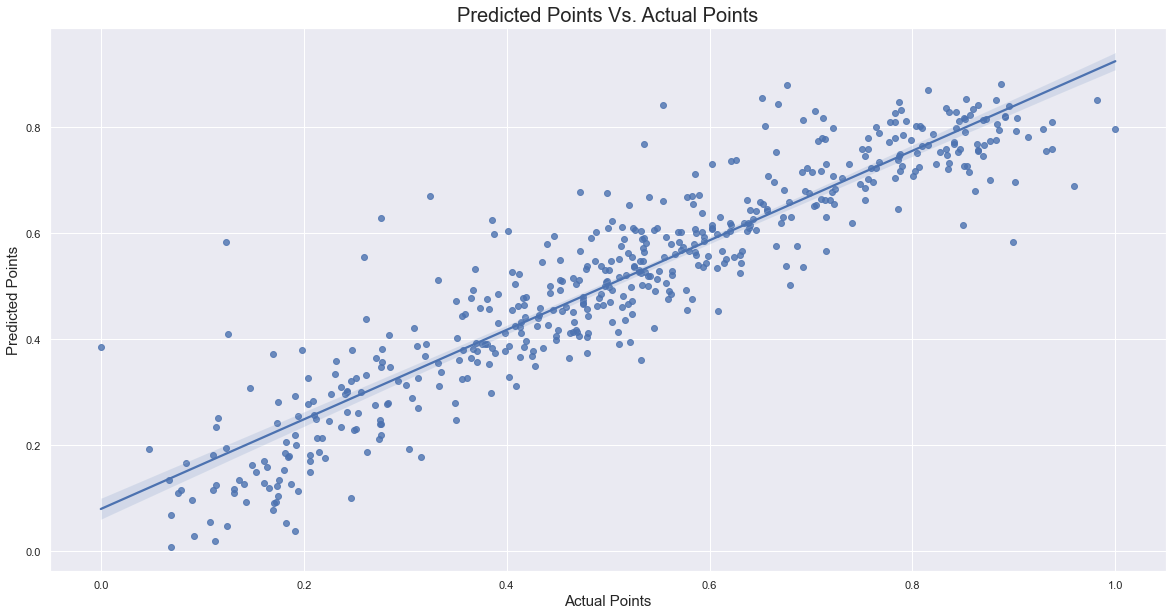

In [64]:
sns.set_theme(color_codes=True)
plt.figure(figsize=(20,10))
sns.regplot(x=y_train, y=y_train_cnt)
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()

## Multicorrelation

In [65]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe.drop("const",axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                 Features   VIF
2                    temp  8.11
3               windspeed  4.73
1              workingday  4.67
5           season_winter  2.54
4           season_spring  2.35
0                      yr  2.09
10                 mnth_8  1.94
13              weekday_6  1.83
9                  mnth_6  1.68
8                  mnth_5  1.63
12                mnth_10  1.62
7                  mnth_4  1.57
15        weathersit_mist  1.57
11                 mnth_9  1.50
6                  mnth_3  1.36
14  weathersit_light_snow  1.10


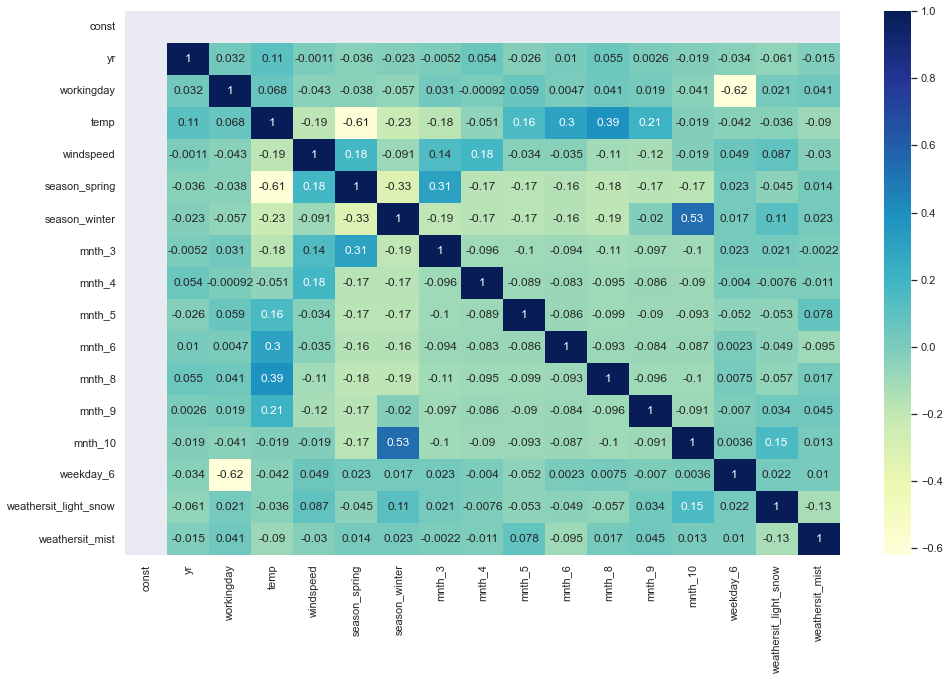

In [66]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(X_train_rfe.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Prediction for Test Data

#### Applying the scaling on the test sets

In [67]:
X_train_rfe.columns

Index(['const', 'yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_winter', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_8',
       'mnth_9', 'mnth_10', 'weekday_6', 'weathersit_light_snow',
       'weathersit_mist'],
      dtype='object')

In [68]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [69]:
y_test = df_test.pop('cnt')
X_test = df_test

In [70]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_winter', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_8',
       'mnth_9', 'mnth_10', 'weekday_6', 'weathersit_light_snow',
       'weathersit_mist']]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [71]:
# Making predictions
y_pred = lm.predict(X_test_new)

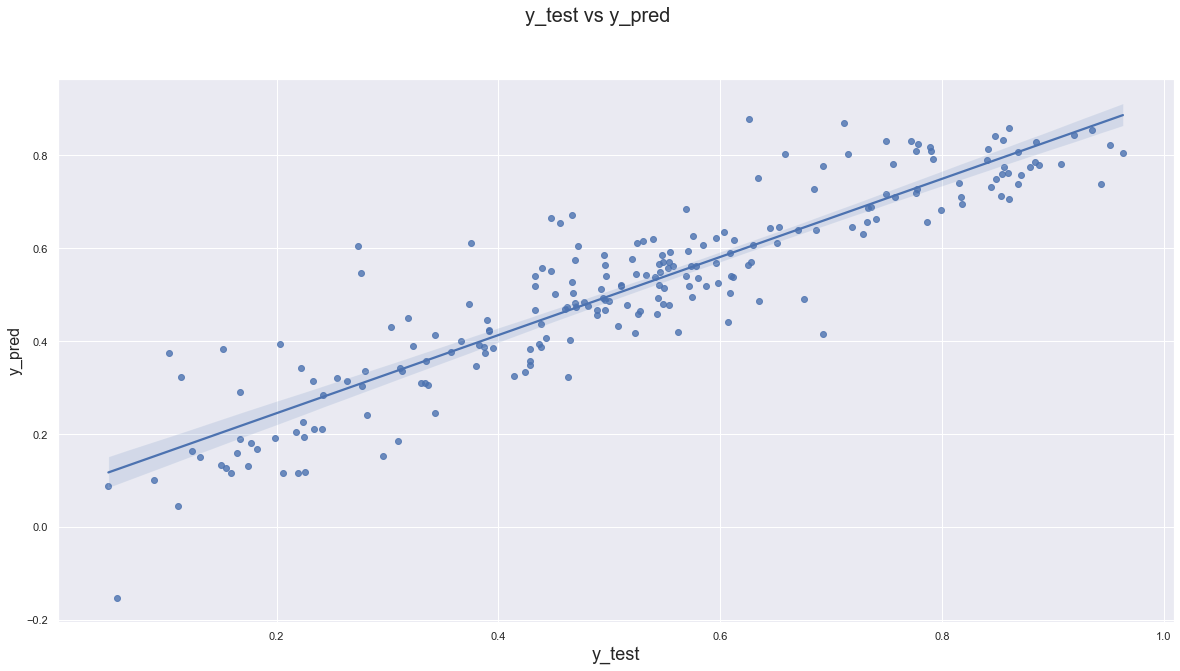

In [72]:
# Plotting y_test and y_pred to understand the spread.
sns.set_theme(color_codes=True)
plt.figure(figsize=(20,10))
sns.regplot(y_test,y_pred)
plt.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 
plt.show()# Y-label

In [73]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8219243498301338

<div class="alert alert-block alert-danger">
    <span style='font-family:Georgia'>
        <b>EDA on Continuous Variable: </b>
        <ol>
            <li>CNT : Average demand for the bike is <b>~4508 per day</b></li>
            <li>DTEDAY : Does not have much affect on the demand</li>
            <li>TEMP : <b>20-40</b>degress temperature have a higher average rental bike per day than overall average rental<br>
            20-40 have a higher average rental bike per day than 0-20</li>
            <li>ATEMP : <b>25-40</b>degress temperature have a higher average rental bike per day than overall average rental<br>
            25-40 degress temperature have a higher average rental bike per day than 0-25</li>
            <li>HUM : <b>20-30</b> humidity levels have a higher average rental bike per day than overall average rental<br>
            20-30 humidity levels have a higher average rental bike per day than other levels</li>
            <li>WINDSPEED : <b>0-10</b> windspeed levels have a higher average rental bike per day than overall average rental<br>
            0-10 windspeed levels have a higher average rental bike per day than other levels</li>
        </ol>
        <b>EDA on Categorical Variable: </b>
        <ol>
            <li>SEASON : <b>Fall, Summer and Winter</b> have a higher average rental bike per day than overall average rental<br>
            Fall and Summer have a higher average rental bike per day than Winter and Spring</li>
            <li>YR : <b>2019 year</b> have a higher average rental bike per day than overall average rental<br>
            2019 year have a higher average rental bike per day than 2018 year</li>
            <li>MNTH : <b>6,9,8,7,5 and 10 months</b> have a higher average rental bike per day than overall average rental<br>
            6,9,8,7,5 and 10 have a higher average rental bike per day than 4,11,3,12,2,1</li>
            <li>HOLIDAY : <b>Non Holidays</b> have a higher average rental bike per day than overall average rental<br>
            Non Holidays have a higher average rental bike per day than Holidays</li>
            <li>WEEKDAY : <b>Weekday 2,3,4,5,6</b> have a higher average rental bike per day than overall average rental<br>
            Weekday 2,3,4,5,6 have a higher average rental bike per day than Weekday 1,2</li>
            <li>WORKINGDAY : <b>Working day</b> have a higher average rental bike per day than overall average rental<br>
            Working day have a higher average rental bike per day than Non Working Day</li>
            <li>WEATHERSIT : <b>Clear, Few clouds, Partly cloudy, Partly cloudy Weather</b> have a higher average rental bike per day than overall average rental<br>
            Clear, Few clouds, Partly cloudy, Partly cloudy Weather have a higher average rental bike per day than Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist, Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds</li>
        </ol>
    </span>    
</div>

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Different Models with R2 values:</b>
        <ol>
            <li>Model Created All Variables<br>R2 = <b>0.853</b><br>Adj R2 = 0.845</li>
            <li>Model Created with top 18 variables using RFE<br>R2 = <b>0.851</b><br>Adj R2 = 0.846</li>
            <li>Model Created droping holiday due to p value > 0.05<br>R2 = <b>0.850</b><br>Adj R2 = 0.845</li>
            <li>Model Created droping humidity due to VIF value > 5<br>R2 = <b>0.845</b><br>Adj R2 = 0.840</li>
            <li>Model Created droping temp due to VIF value > 5<br>R2 = <b>0.795</b><br>Adj R2 = 0.788<br>
               As dropping the temp we are lossing 5% of the variance lets keep temp and finalize the 4th model to predict the test data</li>
        </ol>
    </span>    
</div>

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>R2 value for Test Data</b><br>
        R2 = <b>0.821</b>
    </span>    
</div>

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Analysis based on the coefficient values</b>
        <ol>
            <li>wethersit_light_snow, windspeed, weathersit_mist, season_spring have <b>indirect dependency</b> with the target variable "cnt"</li>
            <li>mnth_10, mnth_8 , workingday, mnth_3, mnth_6, weekday_6, mnth_4, season_winter, mnth_5, mnth_9, yr, temp have <b>direct dependency</b> with the target variable "cnt"</li>
        </ol>
    </span>    
</div>

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Top 3 features contributing significantly</b>
        <ul>
            <li>mnth_10                  0.049952</li>
            <li>mnth_8                   0.051156</li>
            <li>workingday               0.053324</li>
            <li>mnth_3                   0.062035</li>
            <li>mnth_6                   0.063313</li>
            <li>weekday_6                0.065144</li>
            <li>mnth_4                   0.070493</li>
            <li>season_spring            0.075924</li>
            <li>season_winter            0.083347</li>
            <li>weathersit_mist          0.083826</li>
            <li>mnth_5                   0.088043</li>
            <li>mnth_9                   0.112402</li>
            <li>windspeed                0.154429</li>
            <li>yr                       0.235197</li>
            <li>weathersit_light_snow    0.296761</li>
            <li>temp                     0.412069</li>
        </ul>
        <b>Based on the coefficient values for each of the variables the top 3 features contributing towards demand are:</b>
        <ul>
            <li>temp</li>
            <li>weathersit_light_snow</li>
            <li>yr</li>
        </ul>
    </span>    
</div>

# Final Model Equation

<div class="alert alert-block alert-success">
    <span style='font-family:Georgia'>
        <b>Decisive Factor whether an applicant will be Defaulter:</b> <br>
            <h1 style="font-size:5vw"><b>cnt = const * 0.169 + yr * 0.235 + workingday * 0.053 + temp * 0.412 + windspeed * -0.154 + season_spring * -0.076 + season_winter * 0.083 + mnth_3 * 0.062 + mnth_4 * 0.07 + mnth_5 * 0.088 + mnth_6 * 0.063 + mnth_8 * 0.051 + mnth_9 * 0.112 + mnth_10 * 0.05 + weekday_6 * 0.065 + weathersit_light_snow * -0.297 + weathersit_mist * -0.084</b></h1>  
    </span>    
</div>